In [1]:
import pandas as pd
from utils.data_prep_utils import *
from transformers.encoder import *
from transformers.binner import *
from transformers.standardizer import *
from model_binclass import dt_binclass, gb_binclass, gnb_binclass, knn_binclass, lgbm_binclass, logreg_binclass, rf_binclass, svm_binclass,xgboost_binclass

In [2]:
#Data import form drive
df = pd.read_csv(r'resources/Machine failure.csv')
df = df.drop(['TWF','HDF','PWF', 'OSF', 'RNF'], axis=1)

target_col = df.columns[-1]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


In [ ]:
df = df.drop(['UDI', 'Product ID'], axis=1)
df = data_split_stratified(df, target_col,  0.2)

encoder_info = learn_encoder(df[df.dataset==0].drop(columns=['dataset', target_col]))
df = apply_encoder(df, encoder_info, columns_to_drop=['dataset', target_col])

stand_info = learn_standardizer(df[df.dataset==0].drop(columns=['dataset', target_col]))
df = apply_standardizer(df, stand_info, columns_to_drop=['dataset', target_col])

features = df.columns.drop(target_col)

print(f"y_train - 0: {sum((df.dataset == 1) & (df[target_col] == 0))}, 1: {sum((df.dataset == 1) & (df[target_col] == 1))}")
print(f"y_test  - 0: {sum((df.dataset == 0) & (df[target_col] == 0))}, 1: {sum((df.dataset == 0) & (df[target_col] == 1))}")

y_train - 0: 7729, 1: 271
y_test  - 0: 1932, 1: 68


ML

In [54]:
train_set = df[df.dataset == 1]
test_set = df[df.dataset == 0]
X_train = train_set.drop(columns=[target_col, 'dataset'])
X_test = test_set.drop(columns=[target_col, 'dataset'])
X_train

,cat__Type_L,cat__Type_M,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min
0,0.0,1.0,-0.944879,-0.935190,0.144908,0.294860,-1.708395
2,1.0,0.0,-0.944879,-1.001821,-0.188851,0.970840,-1.630039
3,1.0,0.0,-0.895223,-0.935190,-0.614673,-0.043130,-1.598697
6,1.0,0.0,-0.944879,-0.935190,0.188135,0.253892,-1.488999
7,1.0,0.0,-0.944879,-0.935190,-0.004793,0.028565,-1.457656
...,...,...,...,...,...,...,...
9994,1.0,0.0,-0.597287,-1.135082,0.645345,-1.231214,-1.520341
9995,0.0,1.0,-0.597287,-1.068451,0.467458,-1.067341,-1.488999
9996,0.0,0.0,-0.547631,-1.068451,0.633588,-0.831772,-1.441985
9998,0.0,0.0,-0.497975,-0.868560,-0.783612,0.878661,-1.316616


In [55]:
X_test

,cat__Type_L,cat__Type_M,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min
1,1.0,0.0,-0.895223,-0.868560,-0.783612,0.653334,-1.661382
4,1.0,0.0,-0.895223,-0.868560,-0.783612,0.008081,-1.567355
5,0.0,1.0,-0.944879,-0.935190,-0.668411,0.202681,-1.536012
9,0.0,1.0,-0.746255,-0.668669,1.254256,-1.220972,-1.379300
11,0.0,0.0,-0.696599,-0.602039,-0.681892,0.448492,-1.253931
...,...,...,...,...,...,...,...
9981,1.0,0.0,-0.646943,-1.001821,-1.166079,0.725029,1.269132
9982,0.0,1.0,-0.646943,-1.068451,-0.131351,0.591881,1.300474
9986,0.0,1.0,-0.597287,-0.935190,-0.131351,0.243650,1.535542
9987,0.0,1.0,-0.597287,-0.935190,-0.176044,-0.288940,1.582556


Model Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      7729
         1.0       0.97      0.79      0.87       271

    accuracy                           0.99      8000
   macro avg       0.98      0.89      0.93      8000
weighted avg       0.99      0.99      0.99      8000



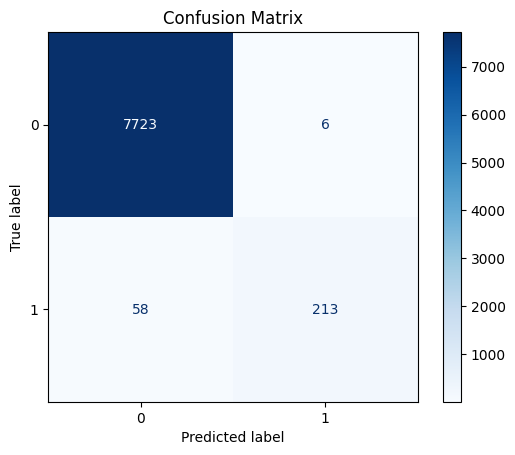

Prediction Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1932
         1.0       0.82      0.75      0.78        68

    accuracy                           0.99      2000
   macro avg       0.91      0.87      0.89      2000
weighted avg       0.99      0.99      0.99      2000



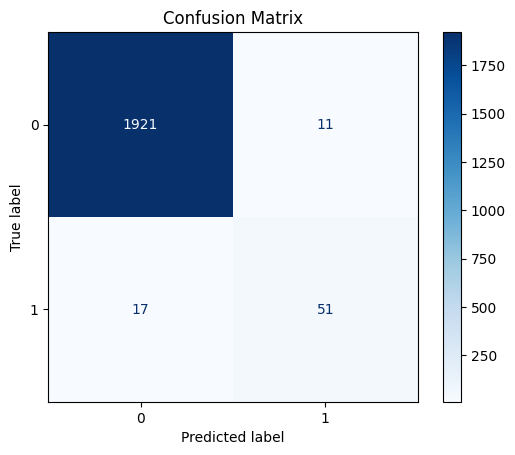

In [ ]:
#DecisionTree
model_info = dt_binclass.learn_model(df[df.dataset == 1], target_col)
df = dt_binclass.apply_model(df, model_info, columns=["dataset", target_col])

print("Model Evaluation:")
dt_binclass.evaluate_model(df[df.dataset == 1], target_col)

print("Prediction Evaluation:")
dt_binclass.evaluate_model(df[df.dataset == 0], target_col)

Model Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      7729
         1.0       0.91      0.85      0.88       271

    accuracy                           0.99      8000
   macro avg       0.95      0.92      0.94      8000
weighted avg       0.99      0.99      0.99      8000



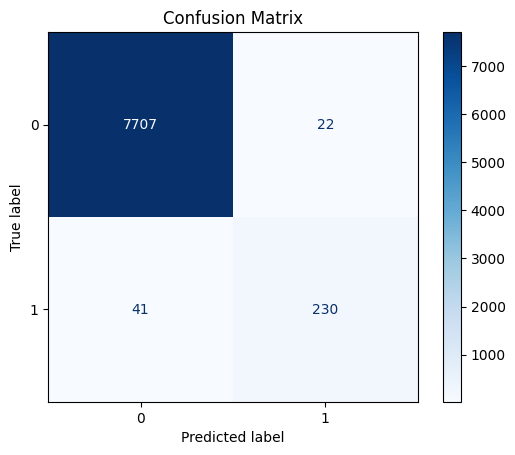


═══ Probability Metrics ═══
ROC AUC: 0.9832
Average Precision: 0.9320


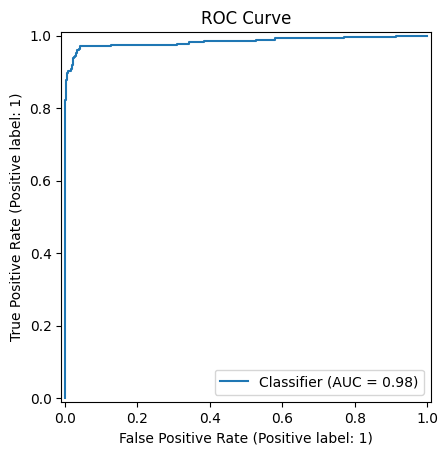

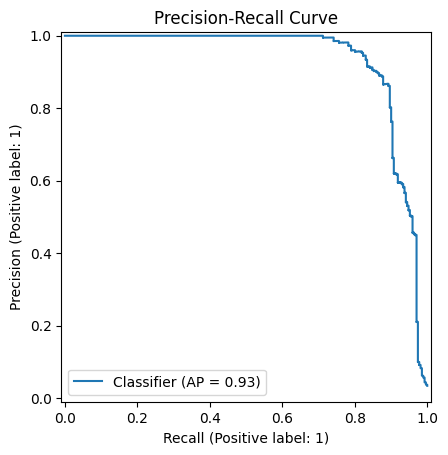

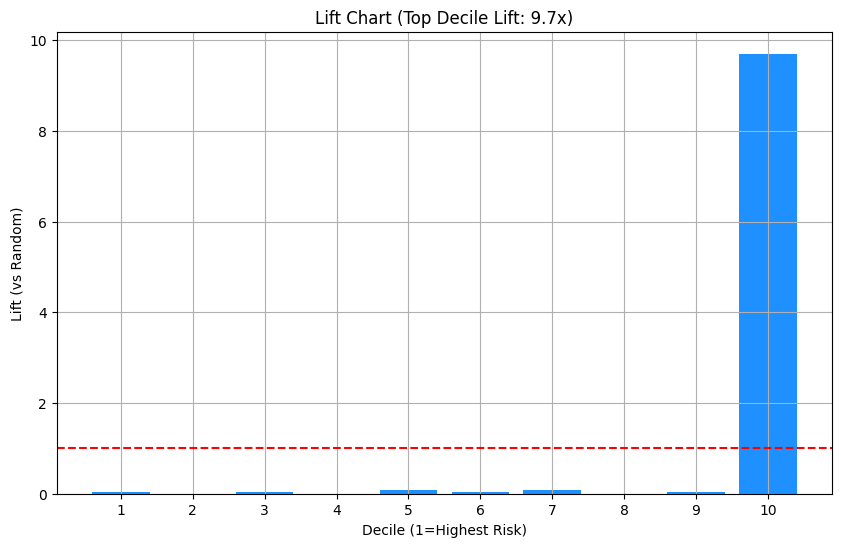

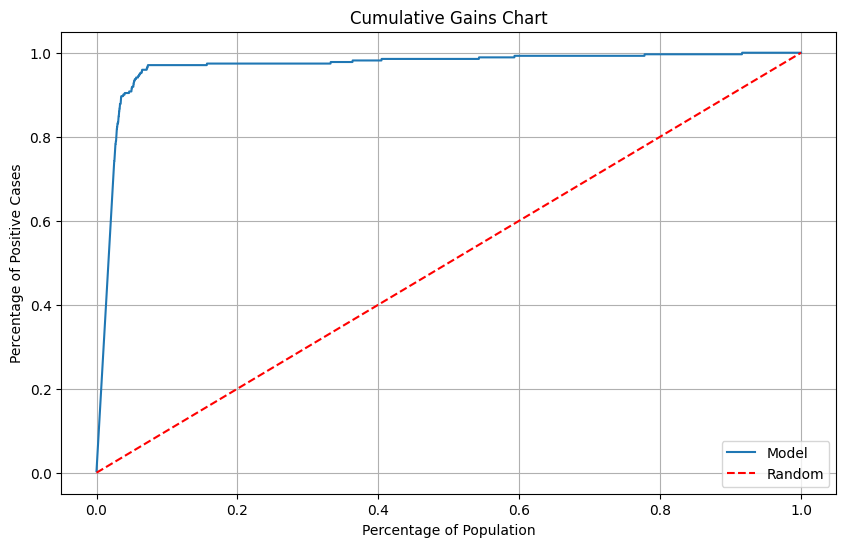

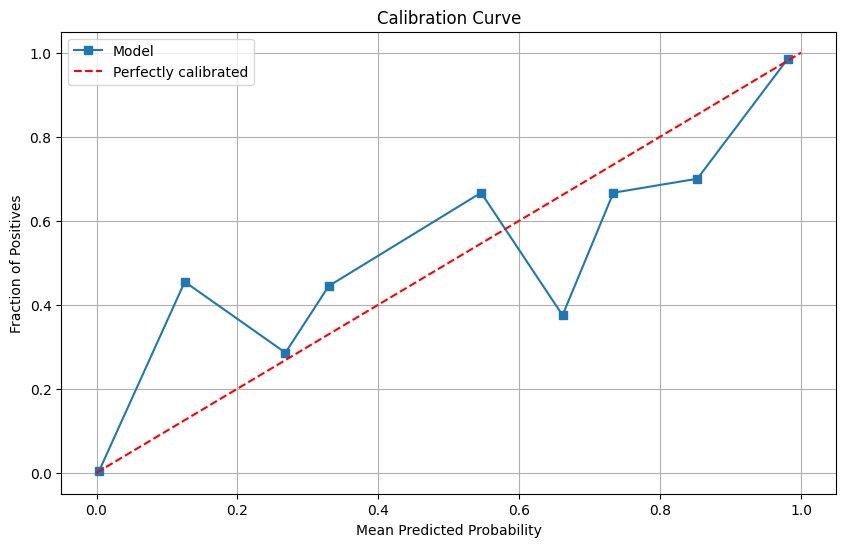

Prediction Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1932
         1.0       0.77      0.75      0.76        68

    accuracy                           0.98      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.98      0.98      0.98      2000



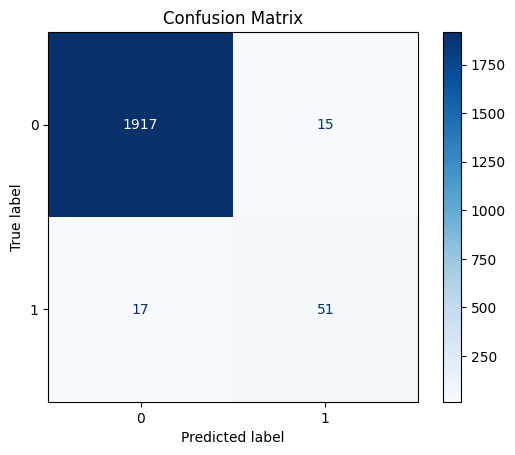


═══ Probability Metrics ═══
ROC AUC: 0.9611
Average Precision: 0.7206


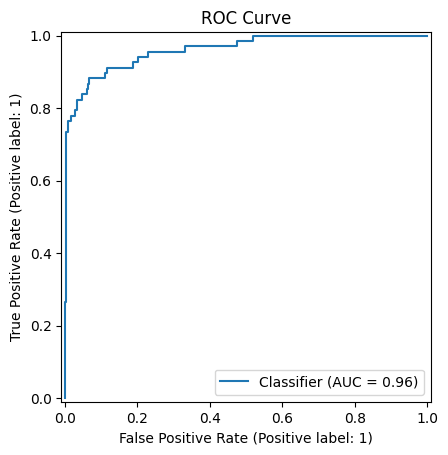

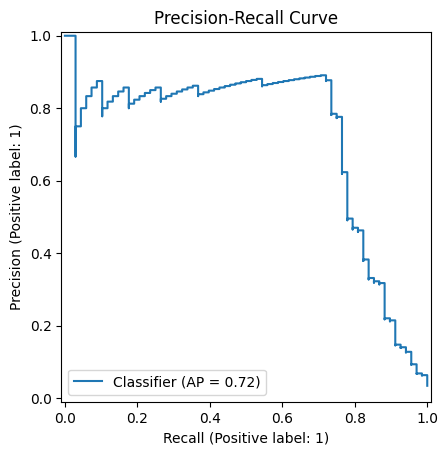

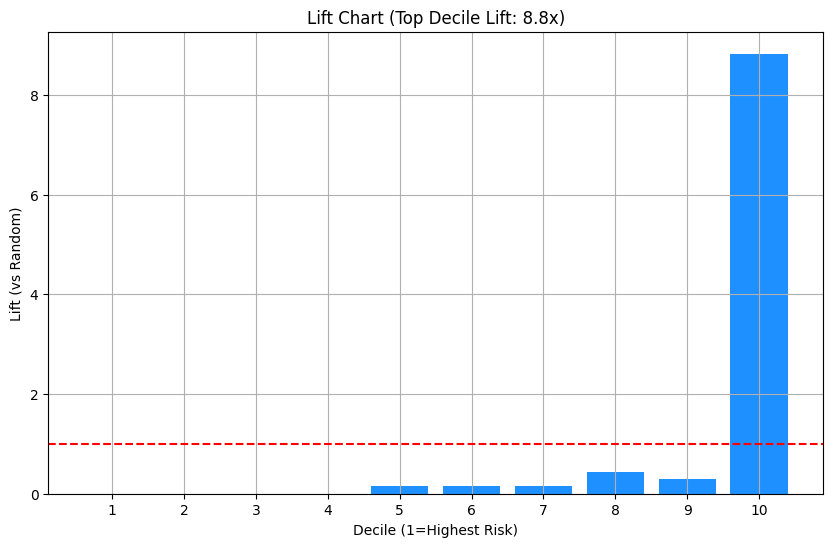

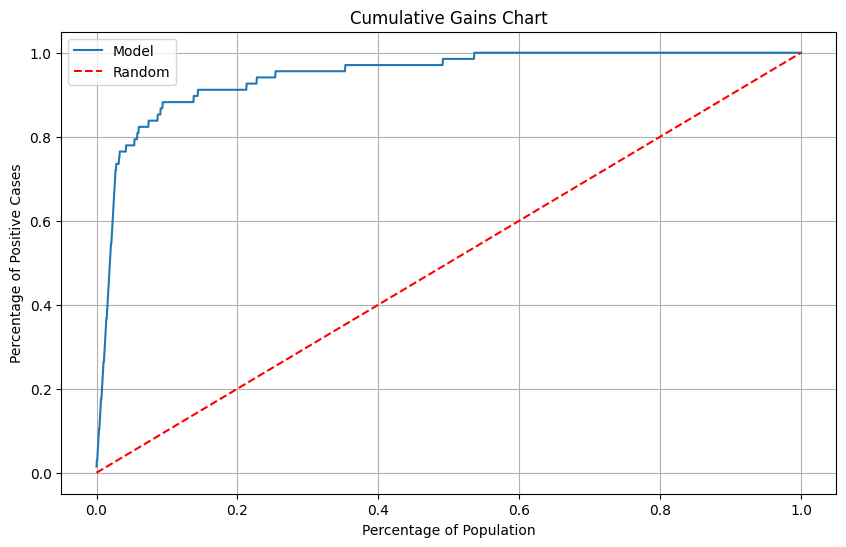

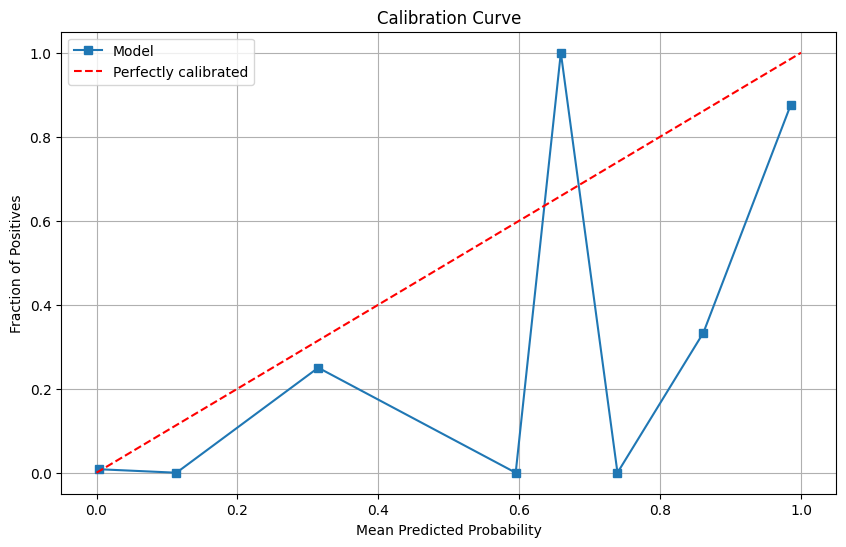

In [ ]:
#LogisticRegression
model_info = logreg_binclass.learn_model(df[df.dataset == 1], target_col)
df = logreg_binclass.apply_model(df, model_info, columns=["dataset", target_col])

print("Model Evaluation:")
logreg_binclass.evaluate_model(df[df.dataset == 1], target_col)

print("Prediction Evaluation:")
logreg_binclass.evaluate_model(df[df.dataset == 0], target_col)

Model Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7729
         1.0       0.96      0.86      0.91       271

    accuracy                           0.99      8000
   macro avg       0.98      0.93      0.95      8000
weighted avg       0.99      0.99      0.99      8000



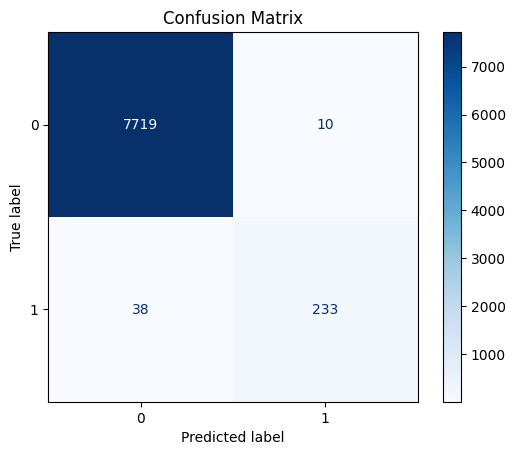


═══ Probability Metrics ═══
ROC AUC: 0.9994
Average Precision: 0.9835


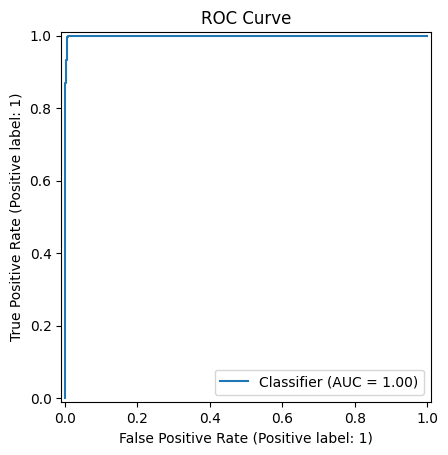

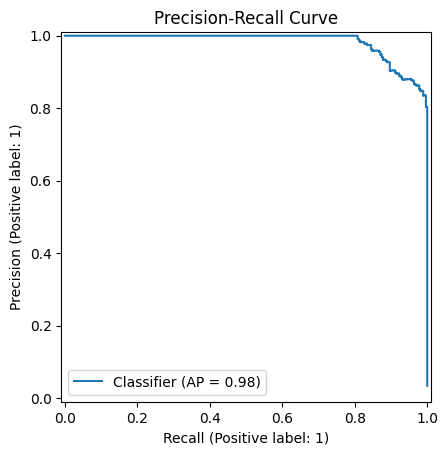

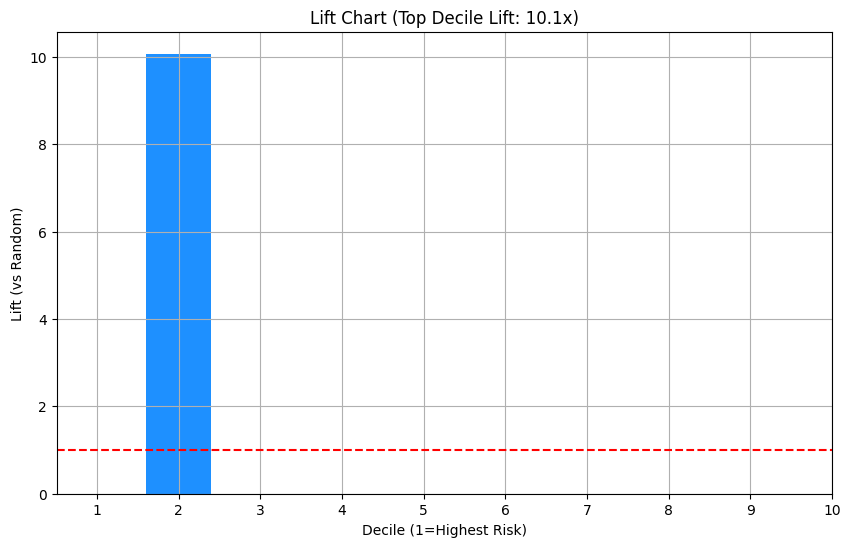

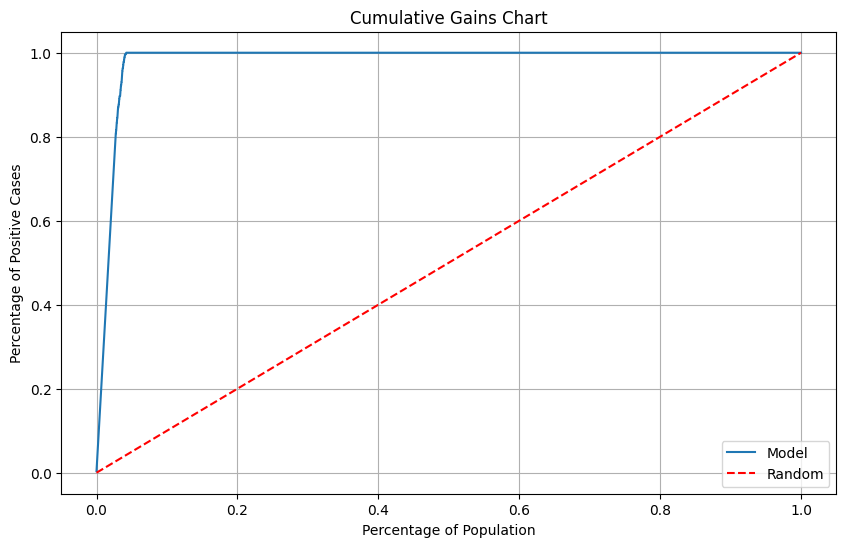

Prediction Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1932
         1.0       0.78      0.75      0.77        68

    accuracy                           0.98      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.98      0.98      0.98      2000



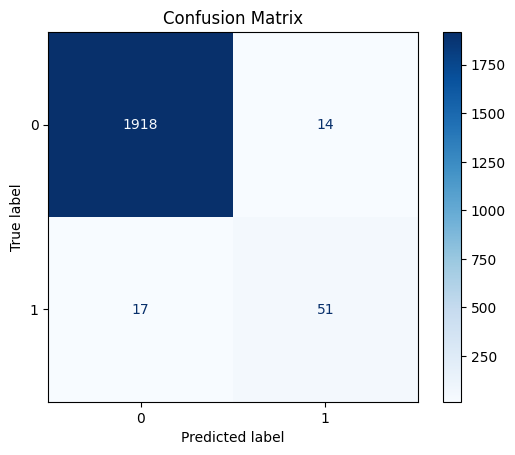


═══ Probability Metrics ═══
ROC AUC: 0.9486
Average Precision: 0.8094


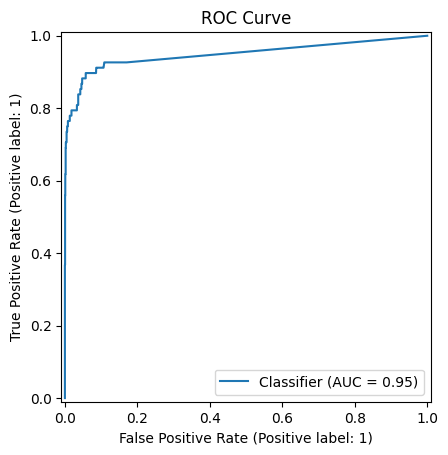

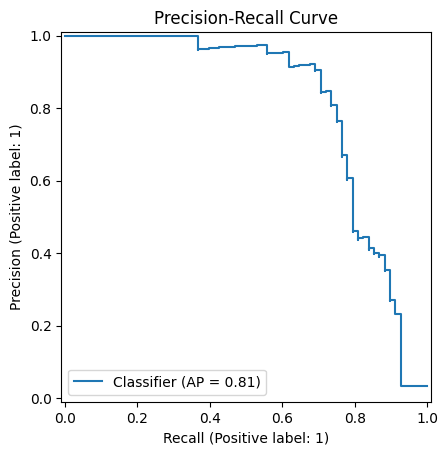

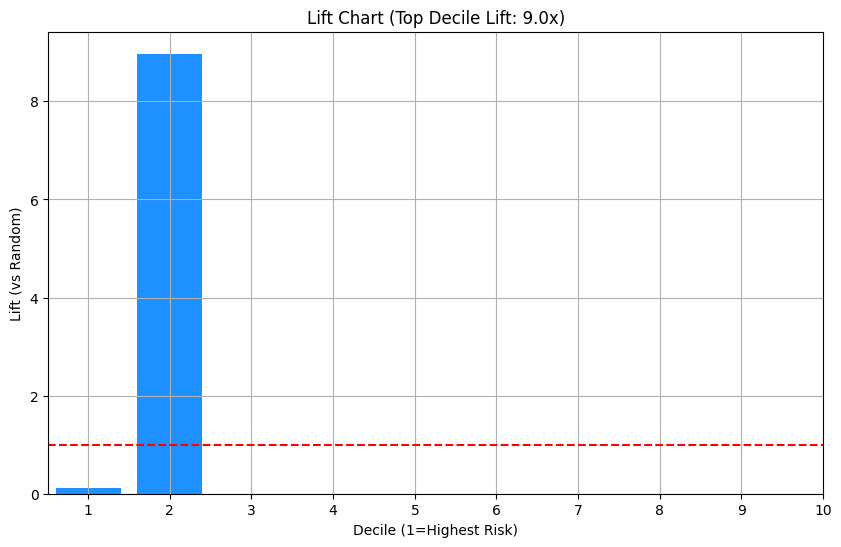

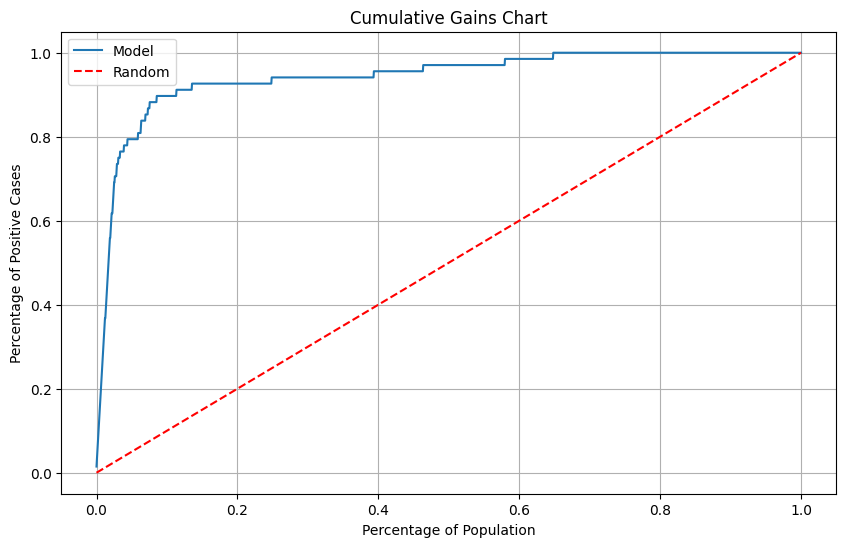

In [ ]:
#RandomForest
model_info = rf_binclass.learn_model(df[df.dataset == 1], target_col)
df = rf_binclass.apply_model(df, model_info, columns=["dataset", target_col])

print("Model Evaluation:")
rf_binclass.evaluate_model(df[df.dataset == 1], target_col)

print("Prediction Evaluation:")
rf_binclass.evaluate_model(df[df.dataset == 0], target_col)

###GradientBoosting

Model Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7729
         1.0       1.00      1.00      1.00       271

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



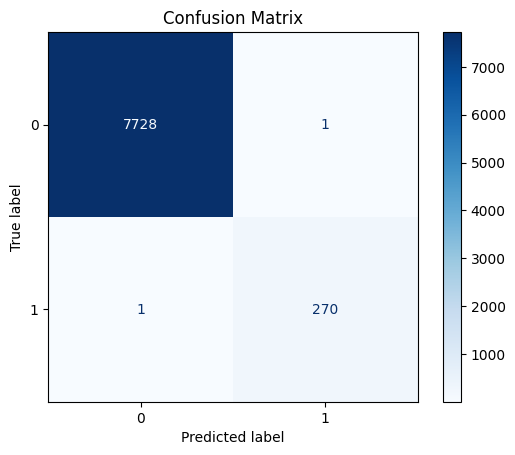


═══ Probability Metrics ═══
ROC AUC: 1.0000
Average Precision: 1.0000


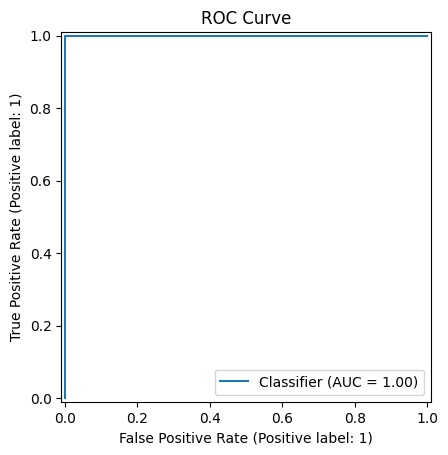

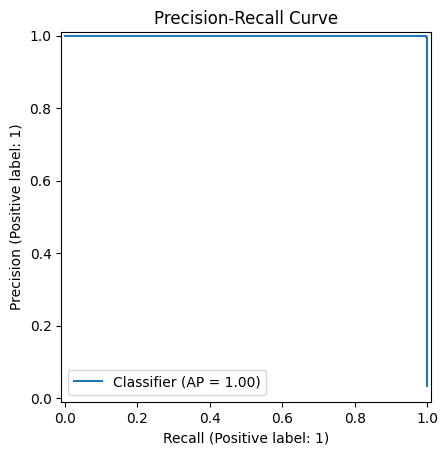

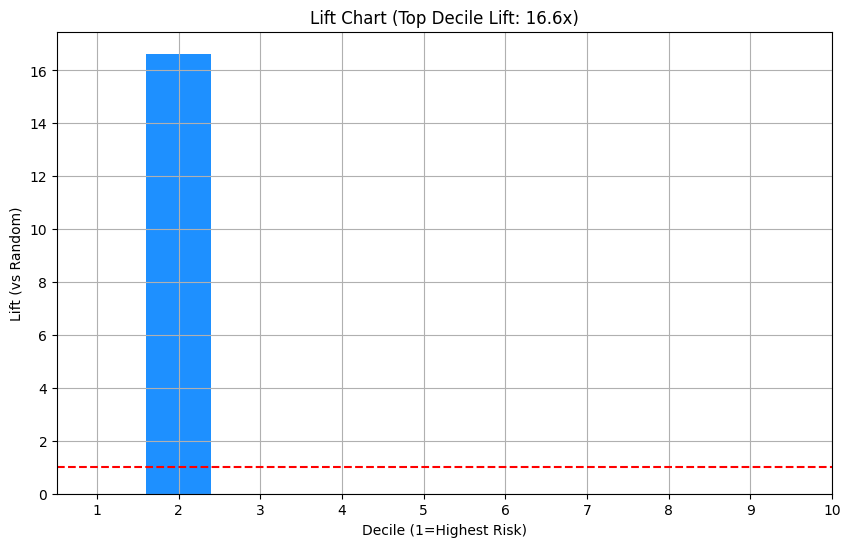

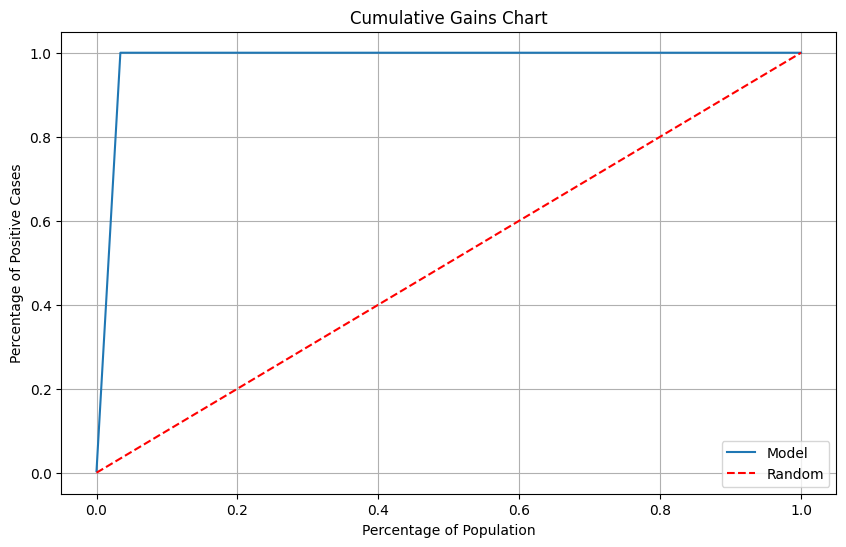

Prediction Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1932
         1.0       0.77      0.75      0.76        68

    accuracy                           0.98      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.98      0.98      0.98      2000



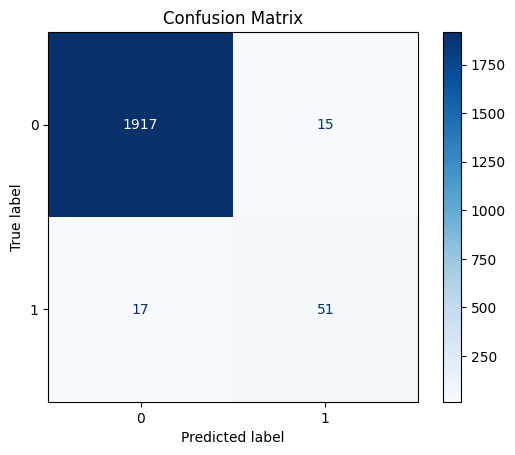


═══ Probability Metrics ═══
ROC AUC: 0.8447
Average Precision: 0.6503


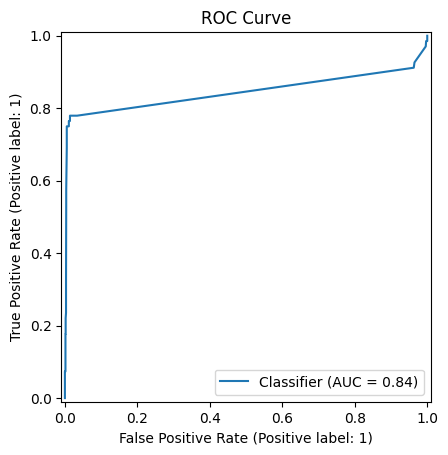

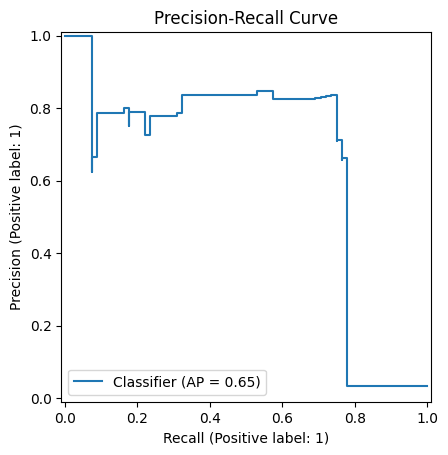

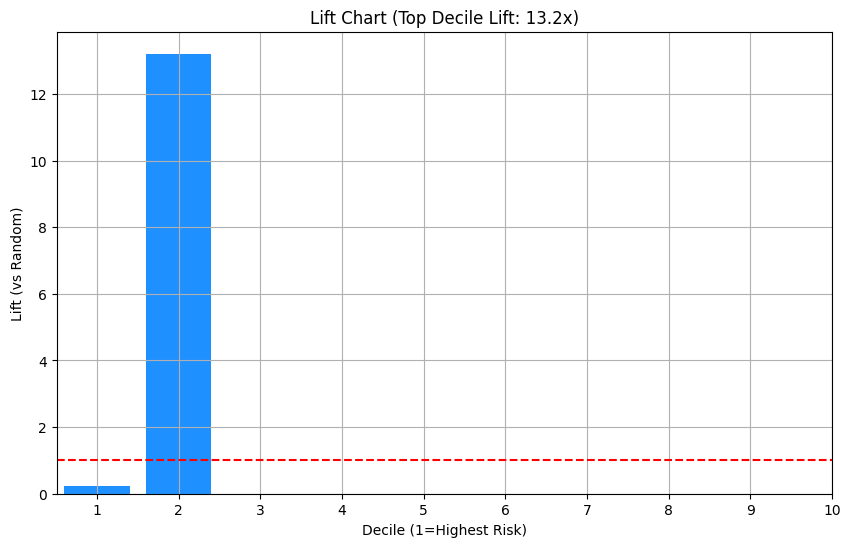

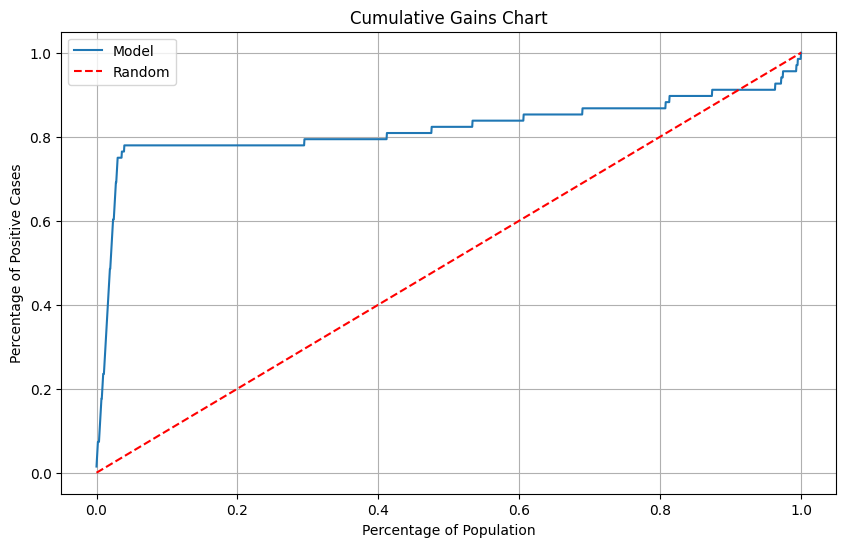

In [ ]:
model_info = gb_binclass.learn_model(df[df.dataset == 1], target_col)
df = gb_binclass.apply_model(df, model_info, columns=["dataset", target_col])

print("Model Evaluation:")
gb_binclass.evaluate_model(df[df.dataset == 1], target_col)

print("Prediction Evaluation:")
gb_binclass.evaluate_model(df[df.dataset == 0], target_col)

In [60]:
#SVM
#model_info = svm_binclass.learn_model(X_train, y_train)
#df_train_predictions = svm_binclass.apply_model(X_train, model_info)
#df_test_predictions = svm_binclass.apply_model(X_test, model_info)

#print("Model Evaluation:")
#svm_binclass.evaluate_model(df_train_predictions, y_train)

#print("Prediction Evaluation:")
#svm_binclass.evaluate_model(df_test_predictions, y_test)

Model Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7729
         1.0       1.00      0.98      0.99       271

    accuracy                           1.00      8000
   macro avg       1.00      0.99      1.00      8000
weighted avg       1.00      1.00      1.00      8000



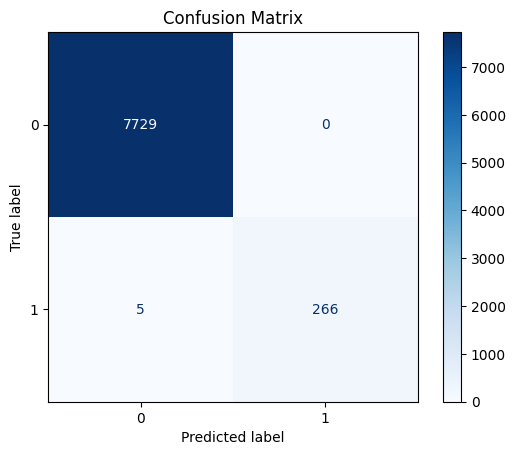


═══ Probability Metrics ═══
ROC AUC: 1.0000
Average Precision: 0.9998


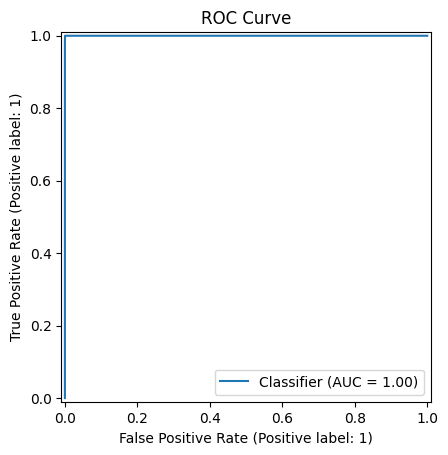

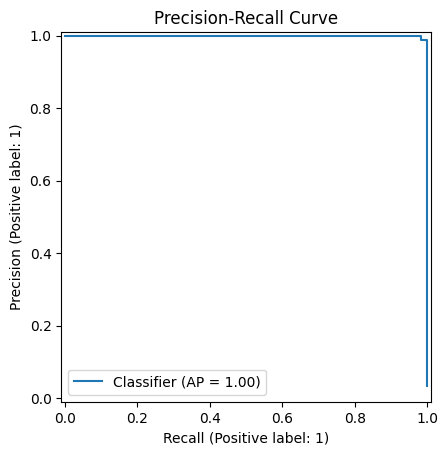

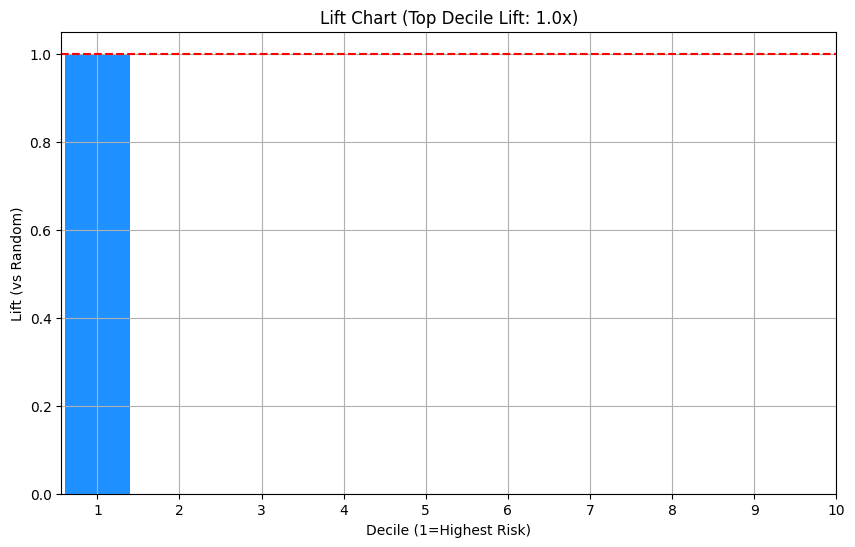

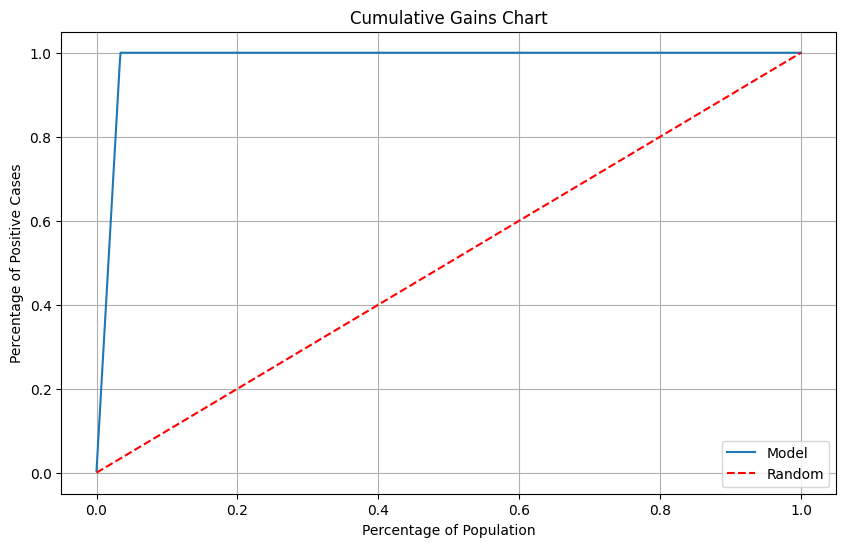

Prediction Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1932
         1.0       0.77      0.75      0.76        68

    accuracy                           0.98      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.98      0.98      0.98      2000



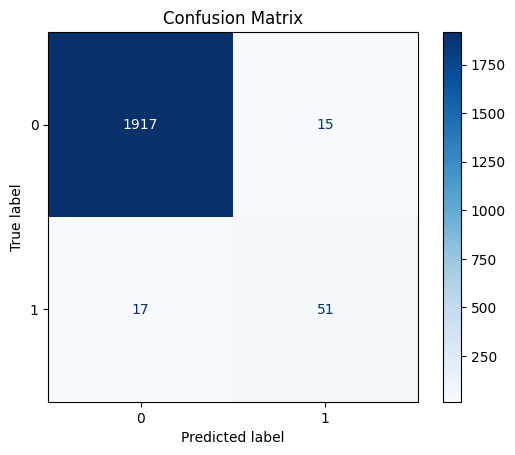


═══ Probability Metrics ═══
ROC AUC: 0.8715
Average Precision: 0.6062


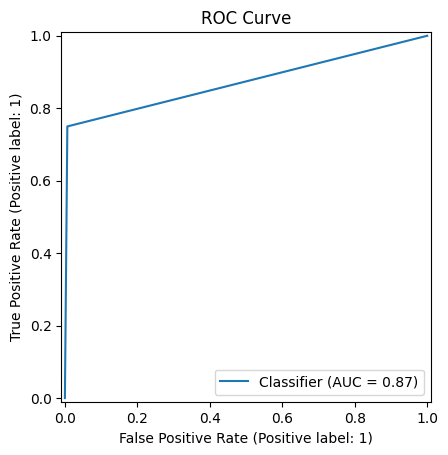

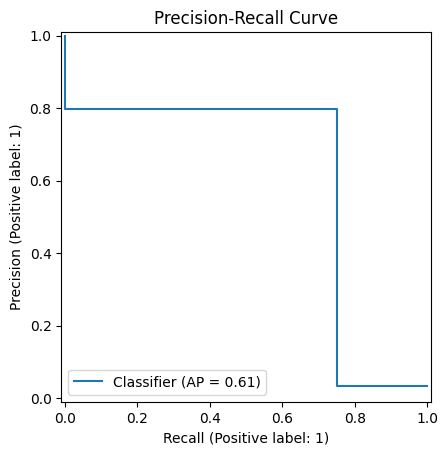

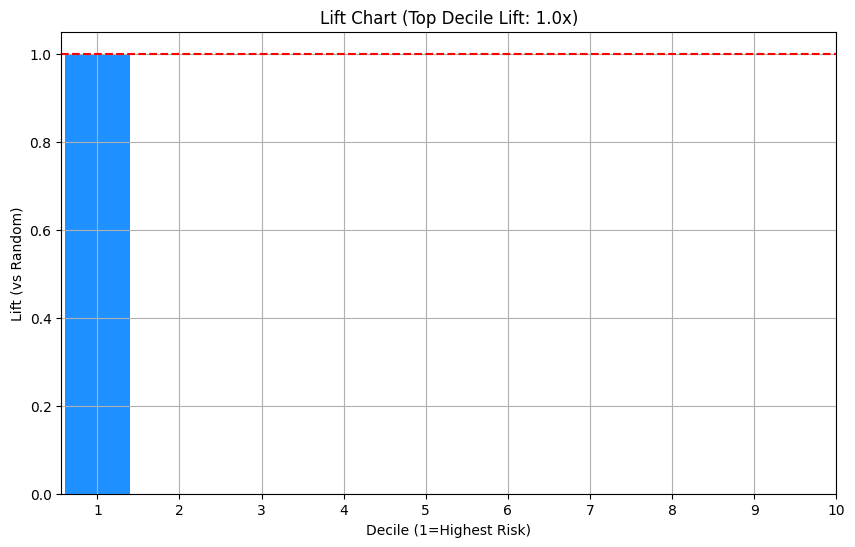

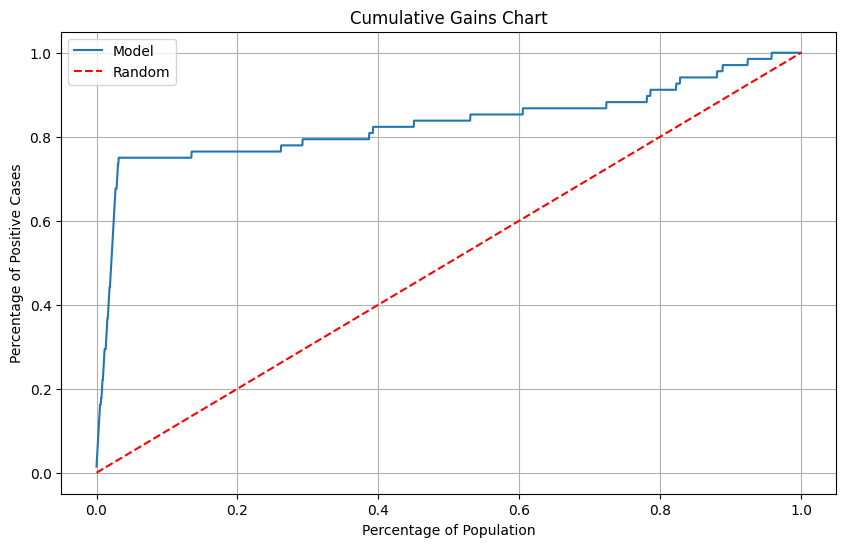

In [ ]:
#KNN
model_info = knn_binclass.learn_model(df[df.dataset == 1], target_col)
df = knn_binclass.apply_model(df, model_info, columns=["dataset", target_col])

print("Model Evaluation:")
knn_binclass.evaluate_model(df[df.dataset == 1], target_col)

print("Prediction Evaluation:")
knn_binclass.evaluate_model(df[df.dataset == 0], target_col)

Model Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7729
         1.0       0.99      1.00      0.99       271

    accuracy                           1.00      8000
   macro avg       0.99      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



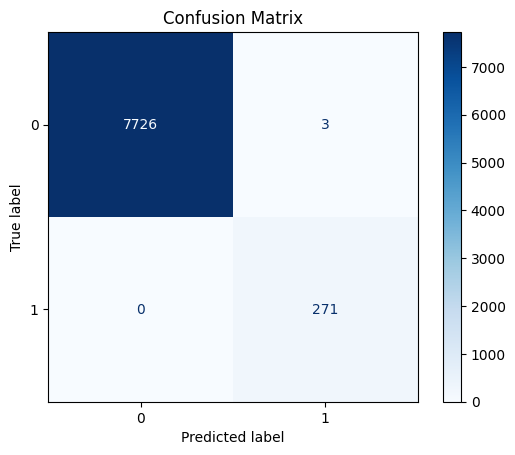


═══ Probability Metrics ═══
ROC AUC: 0.9998
Average Precision: 0.9891


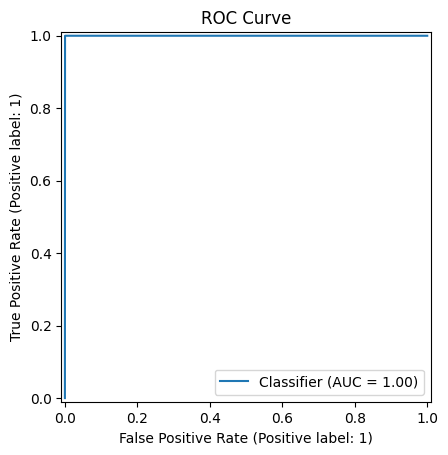

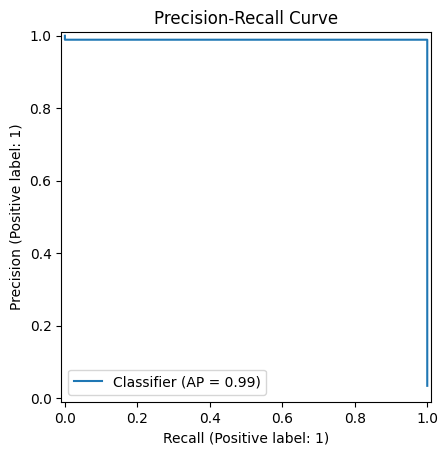

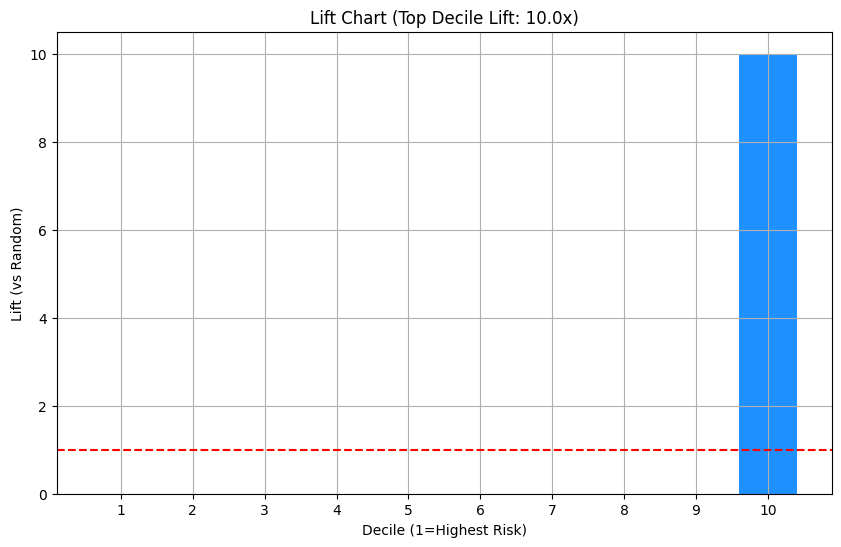

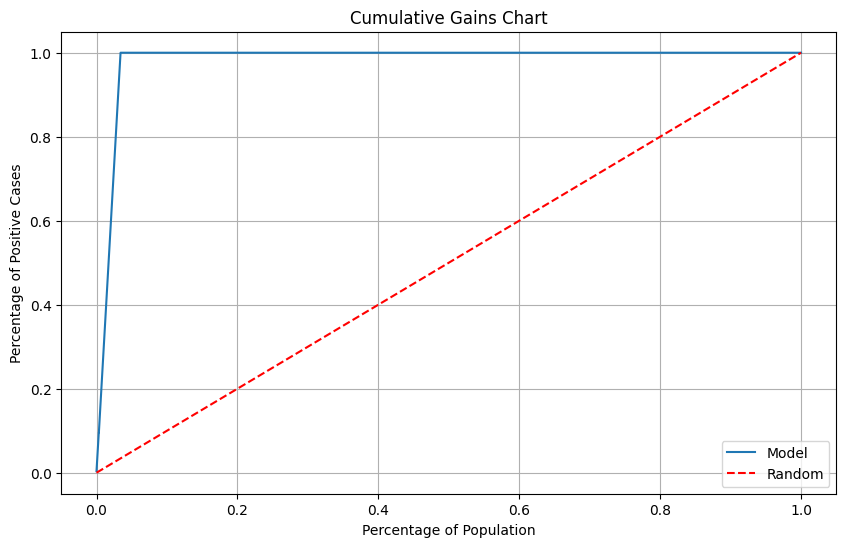

Prediction Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1932
         1.0       0.77      0.75      0.76        68

    accuracy                           0.98      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.98      0.98      0.98      2000



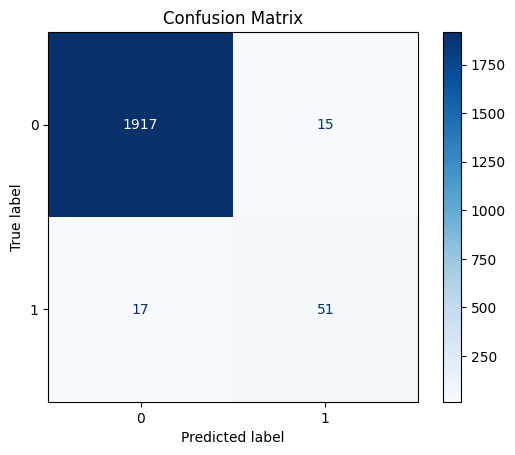


═══ Probability Metrics ═══
ROC AUC: 0.9476
Average Precision: 0.6385


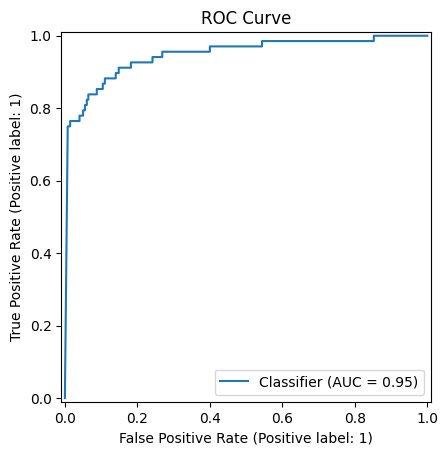

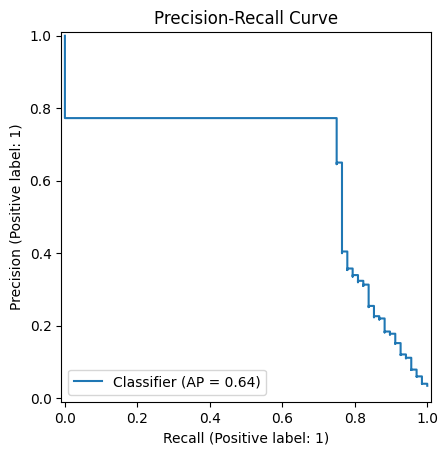

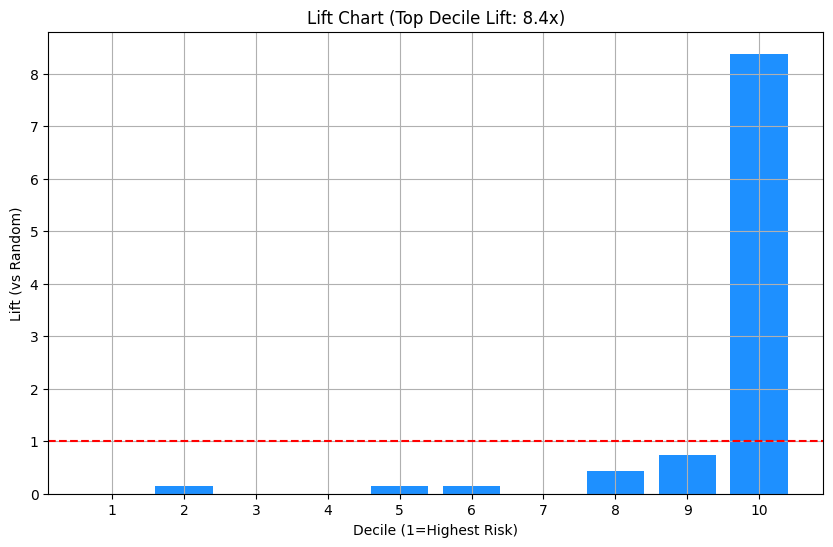

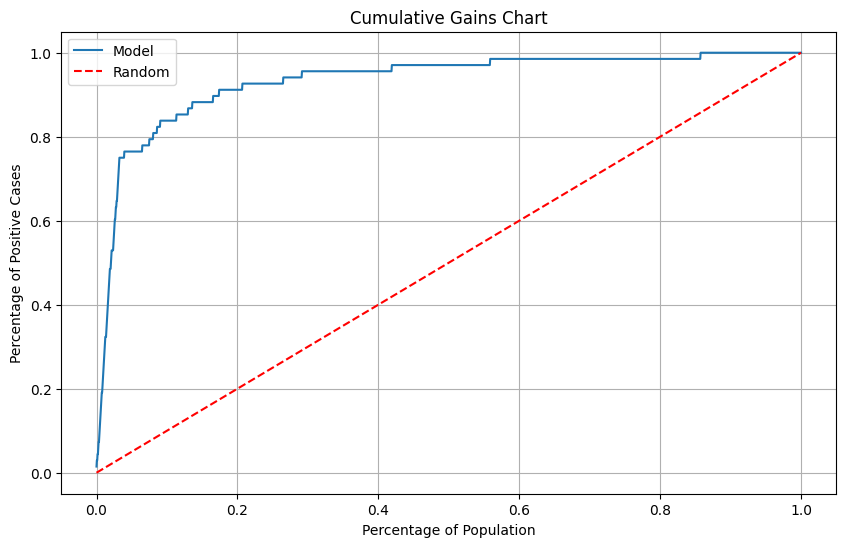

In [ ]:
#Gaussian Naive Bayes
model_info = gnb_binclass.learn_model(df[df.dataset == 1], target_col)
df = gnb_binclass.apply_model(df, model_info, columns=["dataset", target_col])

print("Model Evaluation:")
gnb_binclass.evaluate_model(df[df.dataset == 1], target_col)

print("Prediction Evaluation:")
gnb_binclass.evaluate_model(df[df.dataset == 0], target_col)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 271, number of negative: 7729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033875 -> initscore=-3.350616
[LightGBM] [Info] Start training from score -3.350616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

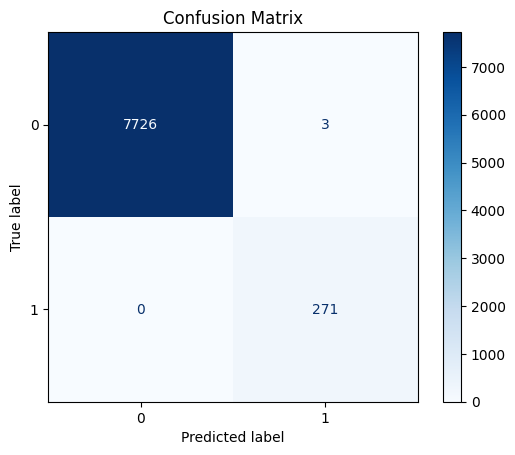


═══ Probability Metrics ═══
ROC AUC: 1.0000
Average Precision: 0.9998


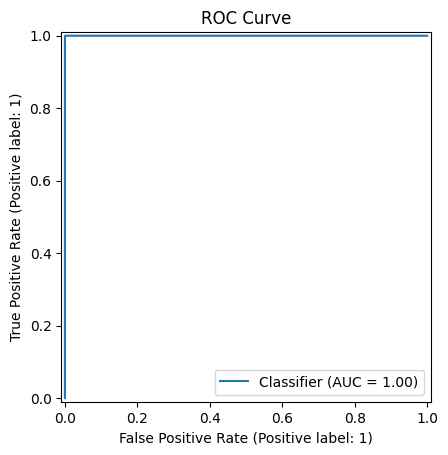

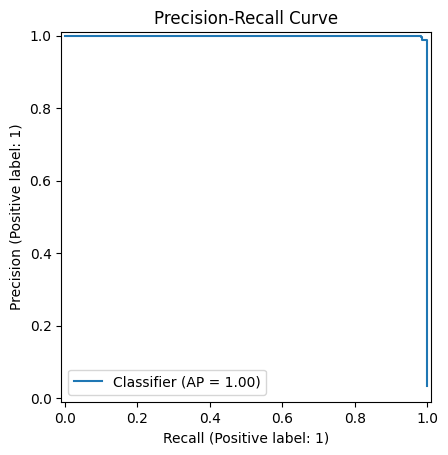

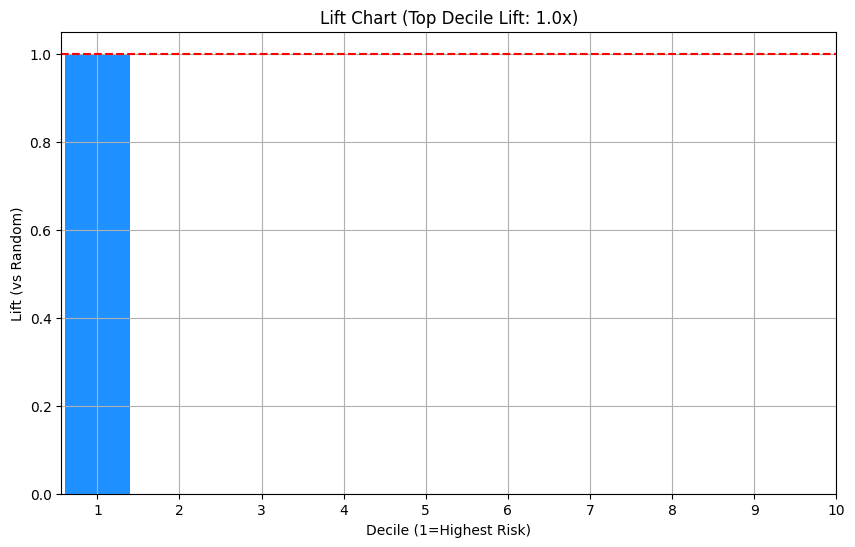

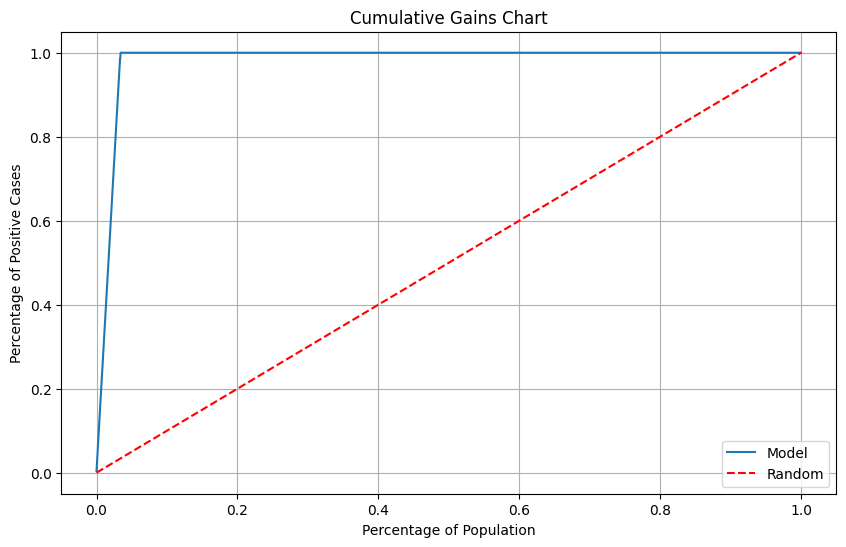

Prediction Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1932
         1.0       0.77      0.75      0.76        68

    accuracy                           0.98      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.98      0.98      0.98      2000



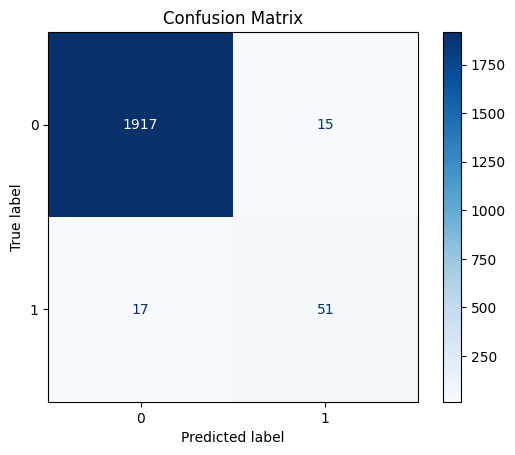


═══ Probability Metrics ═══
ROC AUC: 0.8714
Average Precision: 0.6012


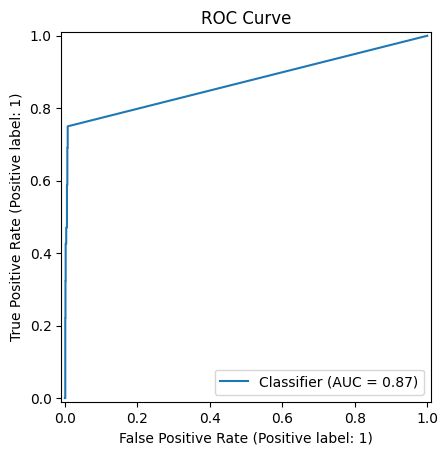

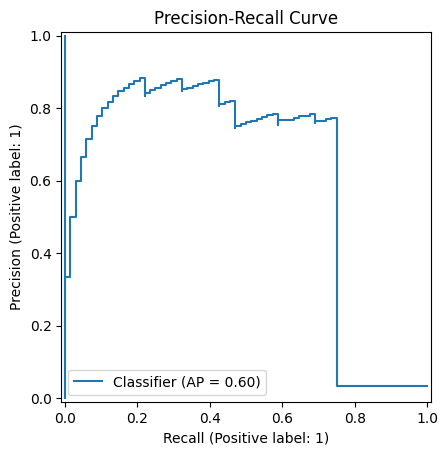

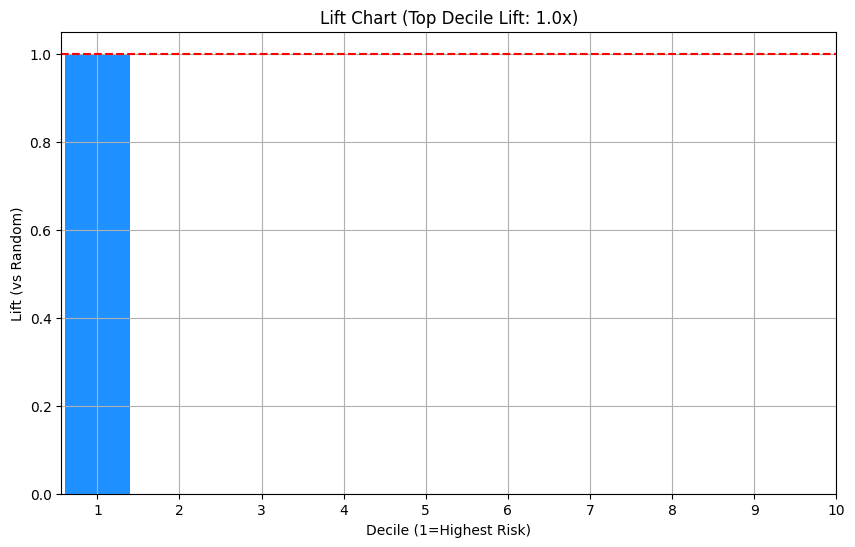

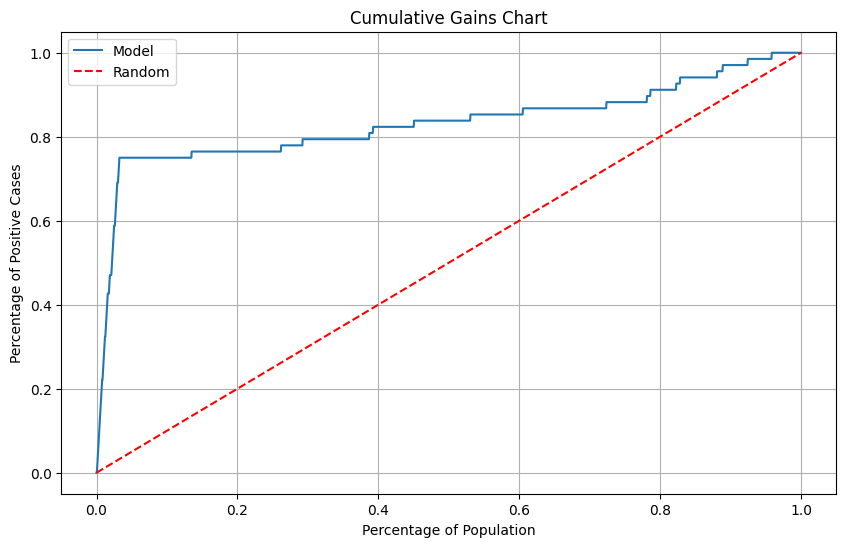

In [ ]:
#LightGBM
model_info = lgbm_binclass.learn_model(df[df.dataset == 1], target_col)
df = lgbm_binclass.apply_model(df, model_info, columns=["dataset", target_col])

print("Model Evaluation:")
lgbm_binclass.evaluate_model(df[df.dataset == 1], target_col)

print("Prediction Evaluation:")
lgbm_binclass.evaluate_model(df[df.dataset == 0], target_col)

c:\Users\sulen\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:01:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7729
         1.0       1.00      0.98      0.99       271

    accuracy                           1.00      8000
   macro avg       1.00      0.99      0.99      8000
weighted avg       1.00      1.00      1.00      8000



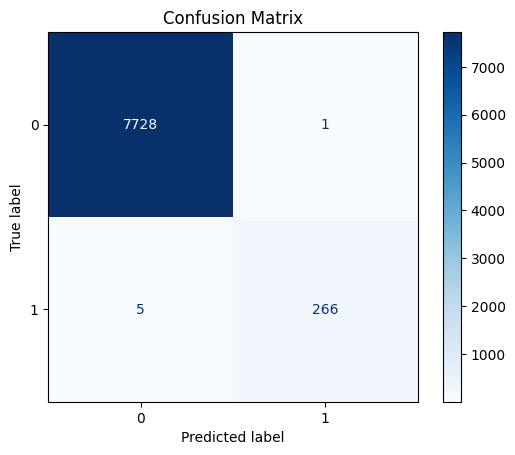


═══ Probability Metrics ═══
ROC AUC: 1.0000
Average Precision: 0.9999


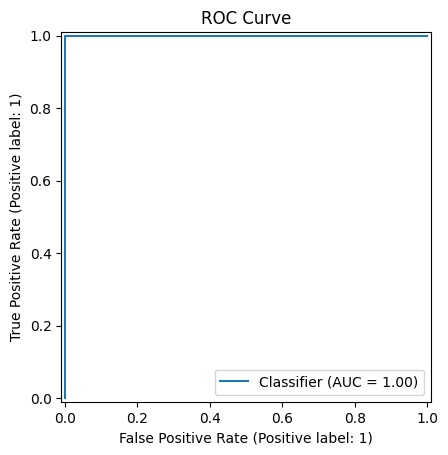

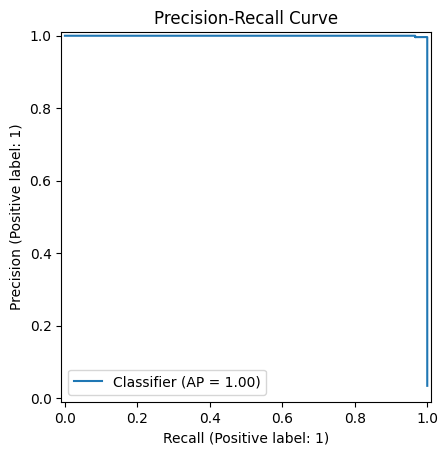

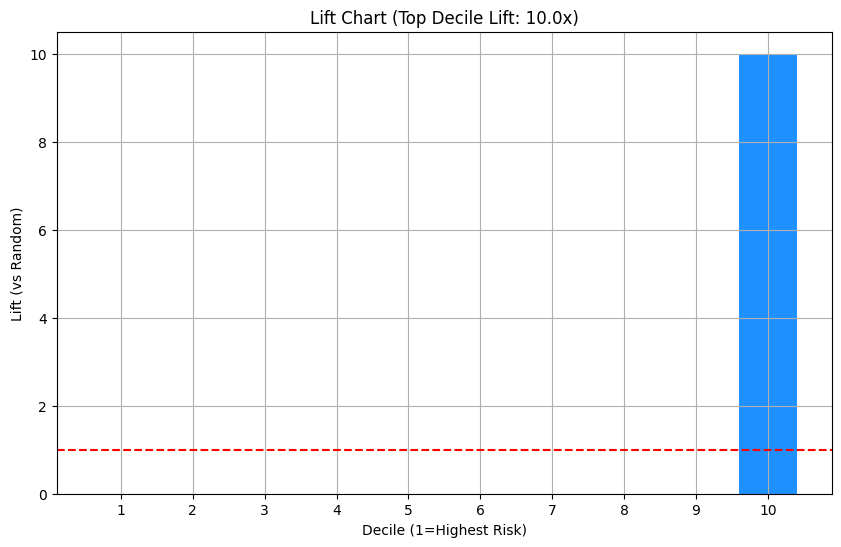

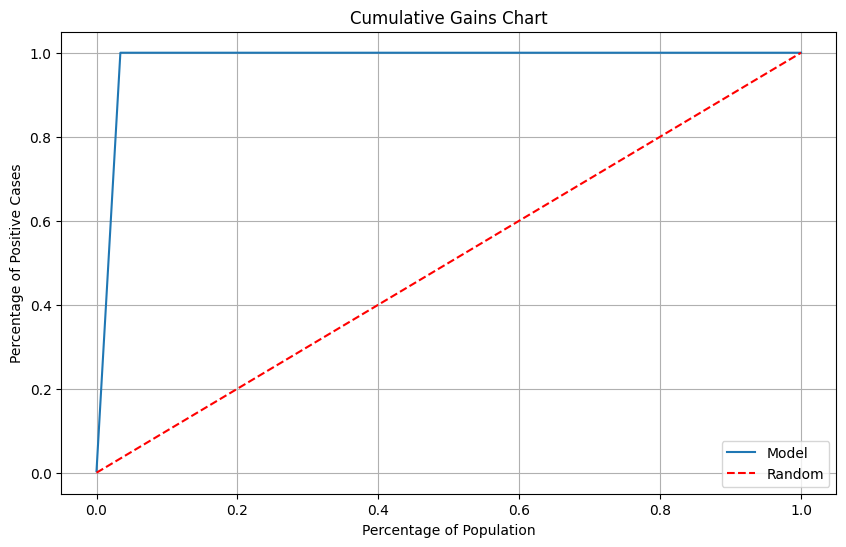

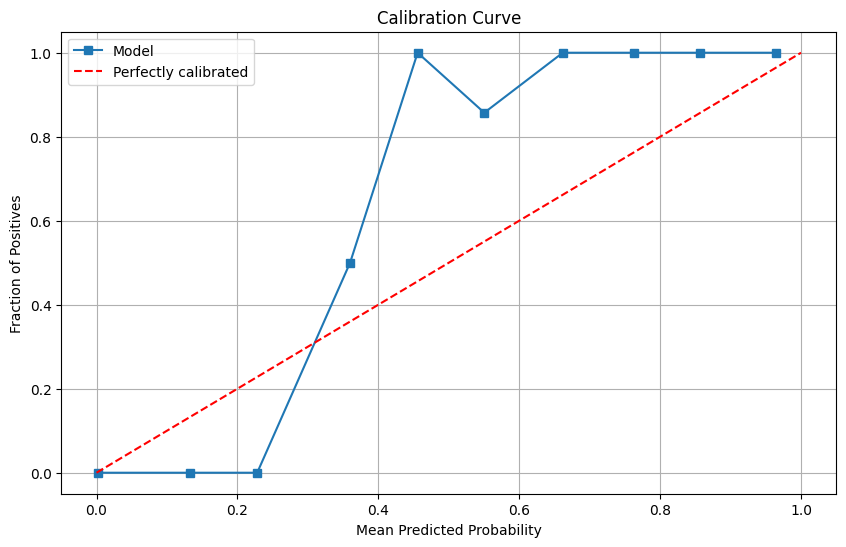

Prediction Evaluation:
═══ Classification Report ═══
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1932
         1.0       0.90      0.66      0.76        68

    accuracy                           0.99      2000
   macro avg       0.94      0.83      0.88      2000
weighted avg       0.99      0.99      0.98      2000



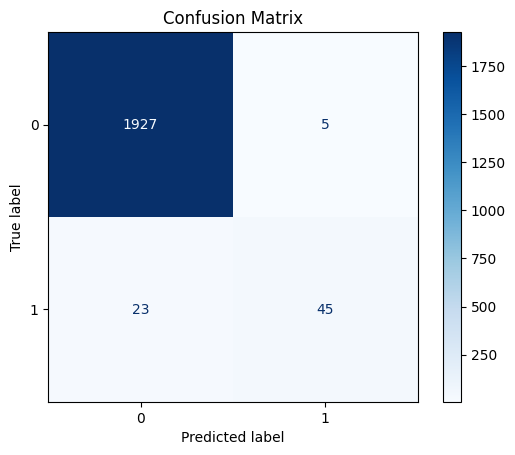


═══ Probability Metrics ═══
ROC AUC: 0.9709
Average Precision: 0.8230


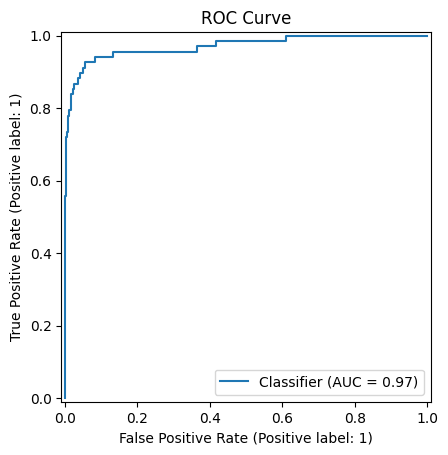

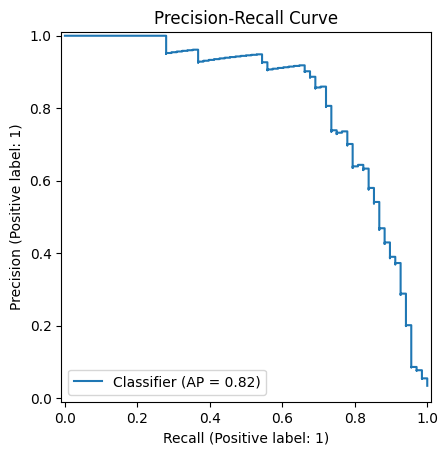

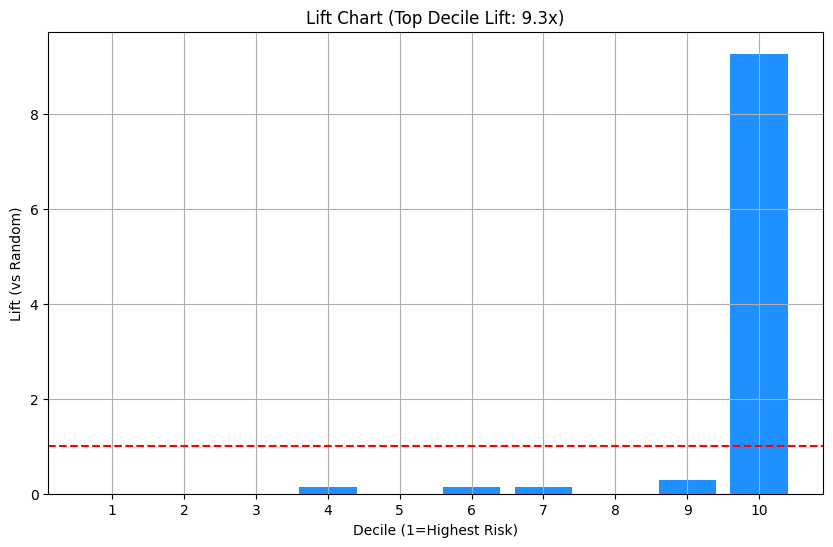

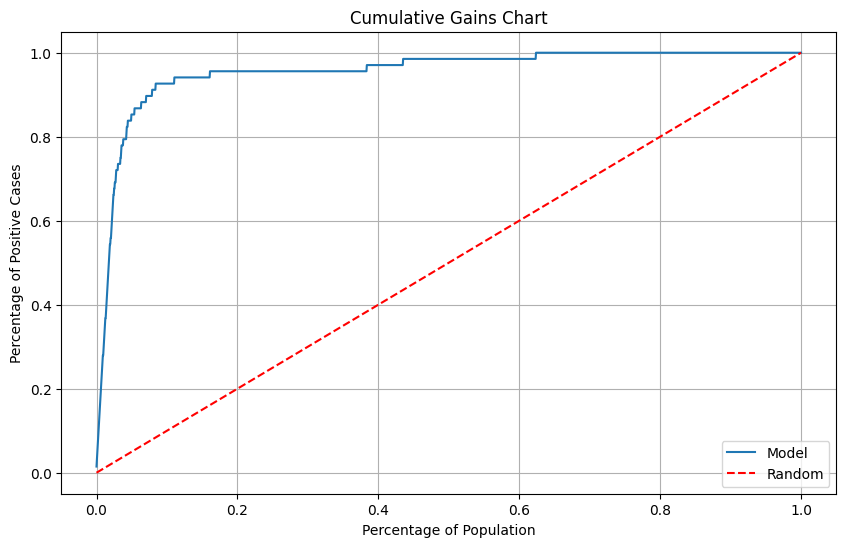

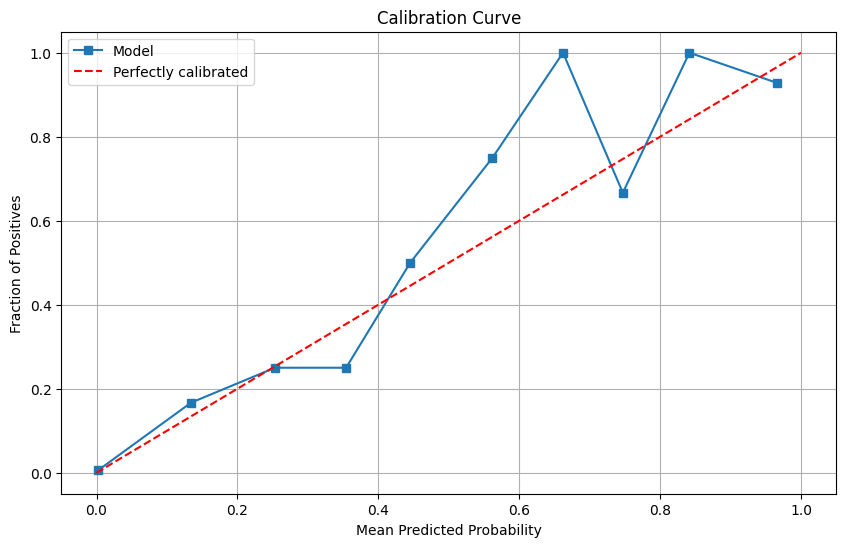

In [ ]:
#XGBoost
model_info = xgboost_binclass.learn_model(df[df.dataset == 1], target_col)
df = xgboost_binclass.apply_model(df, model_info, columns=["dataset", target_col])

print("Model Evaluation:")
xgboost_binclass.evaluate_model(df[df.dataset == 1], target_col)

print("Prediction Evaluation:")
xgboost_binclass.evaluate_model(df[df.dataset == 0], target_col)

###SHAP

In [68]:
df_features = df[features]
X_train = df_features[df_features.dataset == 1].drop(columns=["dataset"]) 
X_test = df_features[df_features.dataset == 0].drop(columns=["dataset"]) 
X_train

,cat__Type_L,cat__Type_M,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min
0,0.0,1.0,-0.944879,-0.935190,0.144908,0.294860,-1.708395
2,1.0,0.0,-0.944879,-1.001821,-0.188851,0.970840,-1.630039
3,1.0,0.0,-0.895223,-0.935190,-0.614673,-0.043130,-1.598697
6,1.0,0.0,-0.944879,-0.935190,0.188135,0.253892,-1.488999
7,1.0,0.0,-0.944879,-0.935190,-0.004793,0.028565,-1.457656
...,...,...,...,...,...,...,...
9994,1.0,0.0,-0.597287,-1.135082,0.645345,-1.231214,-1.520341
9995,0.0,1.0,-0.597287,-1.068451,0.467458,-1.067341,-1.488999
9996,0.0,0.0,-0.547631,-1.068451,0.633588,-0.831772,-1.441985
9998,0.0,0.0,-0.497975,-0.868560,-0.783612,0.878661,-1.316616


In [69]:
X_test

,cat__Type_L,cat__Type_M,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min
1,1.0,0.0,-0.895223,-0.868560,-0.783612,0.653334,-1.661382
4,1.0,0.0,-0.895223,-0.868560,-0.783612,0.008081,-1.567355
5,0.0,1.0,-0.944879,-0.935190,-0.668411,0.202681,-1.536012
9,0.0,1.0,-0.746255,-0.668669,1.254256,-1.220972,-1.379300
11,0.0,0.0,-0.696599,-0.602039,-0.681892,0.448492,-1.253931
...,...,...,...,...,...,...,...
9981,1.0,0.0,-0.646943,-1.001821,-1.166079,0.725029,1.269132
9982,0.0,1.0,-0.646943,-1.068451,-0.131351,0.591881,1.300474
9986,0.0,1.0,-0.597287,-0.935190,-0.131351,0.243650,1.535542
9987,0.0,1.0,-0.597287,-0.935190,-0.176044,-0.288940,1.582556


In [5]:
xgboost_binclass.explain_model(model_info, df[features], sample_index=0, index_feature = True)

XGBoostError: [21:01:34] C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api_utils.h:129: Check failed: std::accumulate(shape.cbegin(), shape.cend(), static_cast<bst_ulong>(1), std::multiplies<>{}) == chunksize * rows (90000 vs. 80000) : 

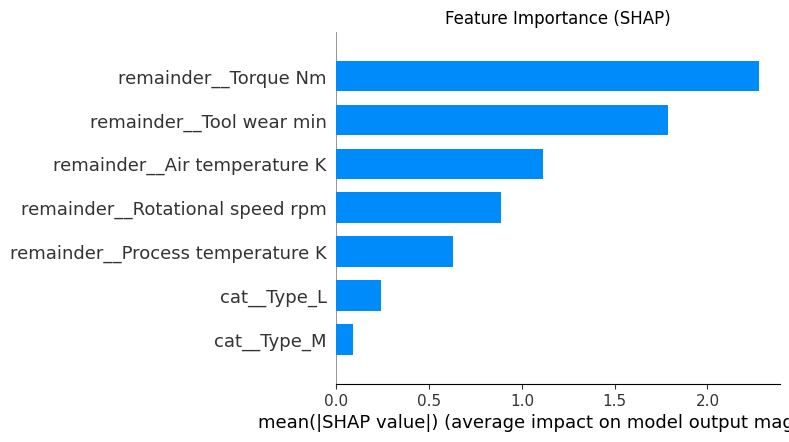

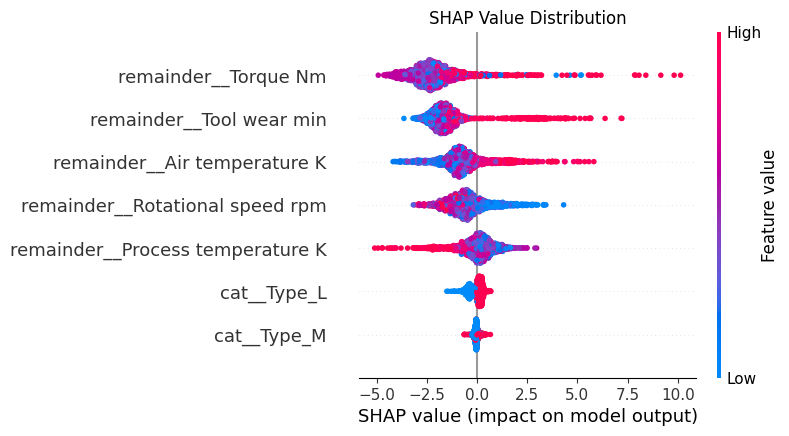

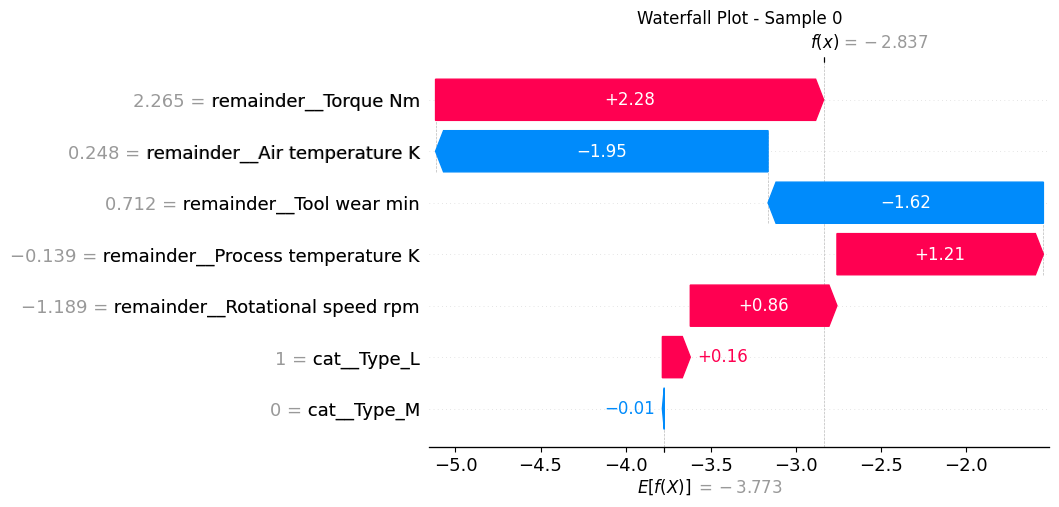

Decision plot could not be generated: decision() missing 1 required positional argument: 'shap_values'


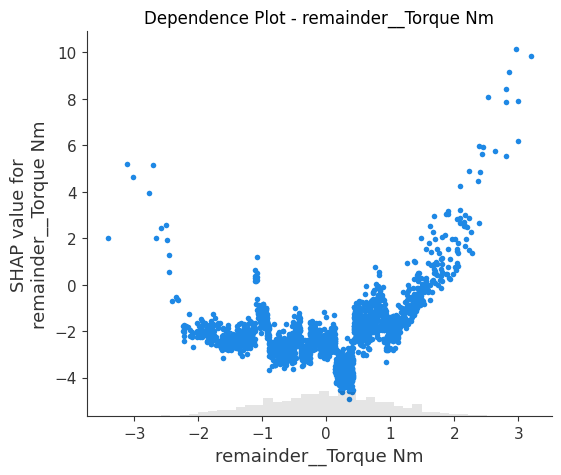

In [ ]:
xgboost_binclass.explain_model(model_info, df[features], sample_index=0, index_feature = True)

In [ ]:
save_encoder(encoder_info, filepath="resources/info/encoder_info")
save_standardizer(stand_info, filepath="resources/info/stand_info")
xgboost_binclass.save_model(model_info, filepath="resources/info/model_info")

Encoder saved to encoder_info
Standardizer saved to stand_info
Model saved to model_info


In [ ]:
import joblib
import pandas as pd

pipeline = {
    'encoder_info': encoder_info,
    'stand_info': stand_info,
    'model_info': model_info,
    'metadata': {
        'features_used': list(X.columns),
        'target_column': target_col,
        'version': '1.0',
        'creation_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
    }
}
joblib.dump(pipeline, "resources/info/pipeline.joblib")
print(f"Full pipeline saved")


Full pipeline saved
